In [378]:
import pandas as pd
df = pd.read_csv("Rent Data.csv")

In [379]:
df.shape

(29, 2)

In [380]:
df.tail()

,area,rent
24,2800,50000
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460


In [381]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    29 non-null     int64
 1   rent    29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


Text(0, 0.5, 'Rent')

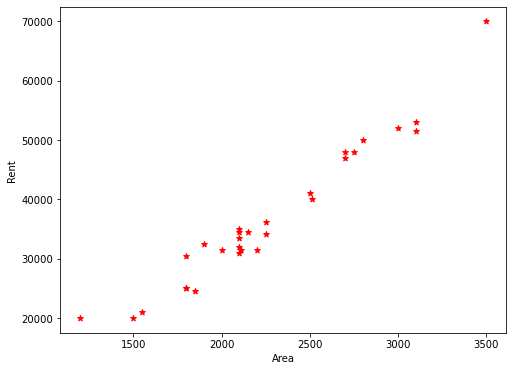

In [383]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,6))
plt.scatter(df.area,df.rent,color="red",marker='*')
plt.xlabel('Area')
plt.ylabel("Rent")

# Sep x, y

In [384]:
x = df.drop('rent',axis=1) # x = df[['area']]
y = df.rent

In [385]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [386]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# validate training and testing data

In [387]:
from sklearn.model_selection import train_test_split

In [388]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.20) # ,random_state=1

In [389]:
xtest.head()

,area
2,2500
16,1800
22,3500
19,2700
21,2100


In [390]:
ytest.head()

2     41050
16    30500
22    70000
19    47000
21    33500
Name: rent, dtype: int64

In [391]:
xtest.shape

(6, 1)

In [392]:
xtrain.shape

(23, 1)

In [393]:
from sklearn.linear_model import LinearRegression

In [394]:
regr = LinearRegression()

# training linear regression model with train data

In [395]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [396]:
m=regr.coef_
m

array([20.27003186])

In [397]:
c=regr.intercept_
c

-9445.478947163538

In [398]:
#y=mx+c
y=(2250*m)+c
y

array([36162.09273099])

In [400]:
x.mean()

area    2259.310345
dtype: float64

In [401]:
y.mean()

36162.09273098538

In [402]:
regr.predict(xtest)

array([41229.60069522, 27040.57839536, 61499.63255218, 45283.60706662,
       33121.58795244, 35148.59113814])

In [403]:
regr.predict(x)

array([31094.58476675, 33121.58795244, 41229.60069522, 36162.09273099,
       51364.6166237 , 29067.58158105, 20959.56883827, 28054.0799882 ,
       45283.60706662, 33121.58795244, 34135.08954529, 33121.58795244,
       33121.58795244, 41432.30101379, 36162.09273099, 53391.6198094 ,
       27040.57839536, 21973.07043112, 27040.57839536, 45283.60706662,
       33324.28827101, 33121.58795244, 61499.63255218, 14878.55928118,
       47310.61025231, 53391.6198094 , 46297.10865946, 27040.57839536,
       35148.59113814])

In [404]:
df['Predicted Rent'] = regr.predict(x)
df.head()

,area,rent,Predicted Rent
0,2000,31500,31094.584767
1,2100,35000,33121.587952
2,2500,41050,41229.600695
3,2250,36100,36162.092731
4,3000,52100,51364.616624


# Best Fit Line

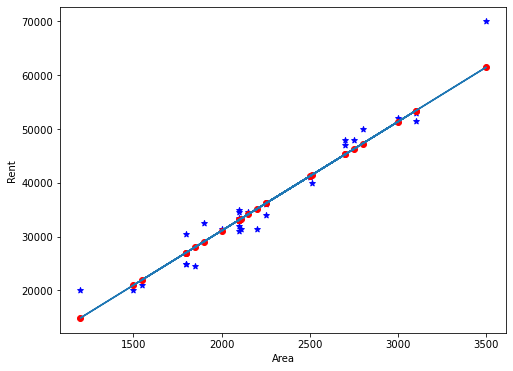

In [405]:
plt.figure(figsize=(8,6))
plt.scatter(df.area, df.rent, color='blue', marker = "*")
plt.xlabel('Area')
plt.ylabel('Rent')
plt.plot(df.area, df['Predicted Rent'])
plt.scatter(df.area, df['Predicted Rent'],color='red', )

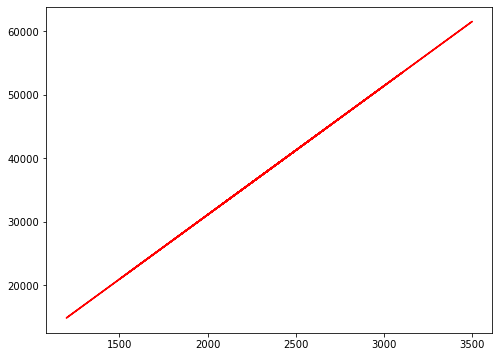

In [406]:
plt.figure(figsize=(8,6))
plt.plot(df.area, df['Predicted Rent'], color="red")


# Predicted y, df.predict(x)

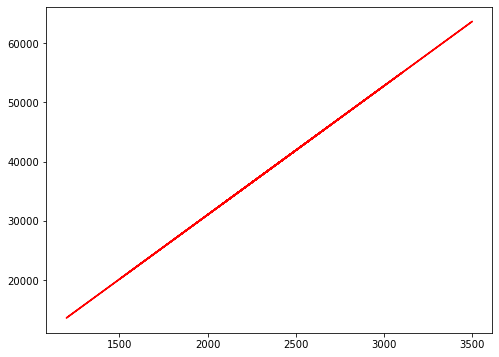

In [407]:
plt.figure(figsize=(8,6))
plt.plot(df.area, reg.predict(x), color="red") 

# Testing accuracy

In [408]:
regr.score(xtest, ytest) 

0.9102748712724752

In [410]:
pred_y = reg.predict(xtest)
pred_y

array([41883.34765184, 26658.42622763, 63633.23540072, 46233.32520162,
       33183.3925523 , 35358.38132718])

In [411]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred_y)
mse

11978876.052432837

In [412]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(ytest, pred_y)
mse

2670.5582661269364

In [418]:
#bf = regr.predict([[1850]])
#bf